# Introduction

Businesses have always used data to make informed business decisions. With significant advancements in collecting, storing,
analyzing, and reporting data in the last couple of decades, extracting actionable insights from large and complex datasets has
never been easier. It has now become an indispensable tool for organizations seeking to gain a competitive edge. More than ever, 
organizations have now been able to drive informed decisions, optimize processes, and improve overall performance by leveraging 
analytics technology. Such organizations include large retail companies.

This report presents an exploratory data analysis (EDA) of Superstore sales data, a fictitious retail company that closely resembles 
the operational characteristics of real-world retailers. The analysis aims to uncover valuable patterns, trends, and insights that can 
help the company better understand its sales dynamics, customer behavior, and profitability.

importing relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# 1. Data Overview

The dataset that is used in this analysis is the Superstore - Sales data available on Kaggle (https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales). It is available in both csv and excel format. 
It has been loaded to a data frame called 'data'. 

In [3]:
data=pd.read_excel('Superstore.xlsx', sheet_name='Orders')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,3,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


The dataset contains records of successful orders. It also contains features such as the `Order Date`, `Ship Date`, `Country`
and `Region` from where the customer lives/resides, product `Category`,`Quantity`, `Sales` and `Profit`.

Below are variable descriptions for each of the columns:

- `row_id`: unique row identifier
- `order_id`: unique order identifier
- `order_date`: date the order was placed
- `ship_date`: date the order was shipped
- `ship_mode`: how the order was shipped
- `customer_id`: unique customer identifier
- `customer_name`: customer name
- `segment`: segment of product
- `country`: country of customer
- `city`: city of customer
- `state`: state of customer
- `postal_code`: postal code of customer
- `region`: Superstore region represented
- `product_id`: unique product identifier
- `category`: category of product
- `sub_category`: subcategory of product
- `product_name`: name of product
- `sales`: total sales of that product in the order
- `quantity`: total units sold of that product in the order
- `discount`: percent discount applied for that product in the order
- `profit`: total profit for that product in the order (net profit, all expenses including discount)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

The dataset contains 9994 records (rows) and 21 features (columns). Among the features, 2 have datetime data type (date), 
3 are floating point (decimals), 3 are integers (whole numbers), and 13 are object (strings) data types. It also has no 
missing values. 

Memory requirement for the dataset is 1.6 MB. 

The dataset also has no missing values. (see `Non-Null Count`)

# 2. Data preprocessing

With the overview, the dataset will not need a lot of data cleaning. However, there are certain transformations that needs 
to be done to ready the data for the analysis. Specifically, the `Row ID` column and some others are not necessary for this 
particular analysis and will be removed. 

Feature engineering will also be done.

In [5]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3) # final dataframe, after columns were removed

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [6]:
# feature engineering, extracts specific date values from the `Order Date` column, creates new features from existing features.

data['month'] = data['Order Date'].dt.month 
data['year']= data['Order Date'].dt.year
data['year_month']= data['Order Date'].dt.to_period('M')
data['total_discount_in_dollars']= data['Sales'] * data['Discount'] # discount's equivalent to dollars
data['selling_price'] = data['Sales'] / data['Quantity'] # calculates selling price for the each product
data['(net)_profit_before_discount'] = data['Sales'] * data['Discount'] + data['Profit'] # net profit before deducting discount
data['order_fulfillment_time'] = data['Ship Date'] - data['Order Date'] # interval between order placed and order shipped
data['net_profit_per_unit_sold']= data['Profit'] / data['Quantity'] # net profit generated per unit sold
data= data.rename(columns={'Profit':'net_profit'}) # renames Profit column with net_profit, a more specific name
data['profit_margin']= data['net_profit'] / data['Sales'] * 100 # for a 25% profit margin, the company makes .25 dollars per 1 dollar sale
data['discounted_sales'] = data['Sales'] - (data['Discount']*data['Sales']) # extracts sales accounted for discount

In [7]:
print('Output dataframe:')
data.head(5)

Output dataframe:


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
0,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,0.0000,41.9136,11,2013,2013-11,0.0000,130.9800,41.9136,3 days,20.9568,16.0000,261.9600
1,CA-2013-152156,2013-11-09 00:00:52,2013-11-12 00:00:52,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,...,0.0000,219.5820,11,2013,2013-11,0.0000,243.9800,219.5820,3 days,73.1940,30.0000,731.9400
2,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,...,0.0000,6.8714,6,2013,2013-06,0.0000,7.3100,6.8714,4 days,3.4357,47.0000,14.6200
3,US-2012-108966,2012-10-11 00:00:00,2012-10-18 00:00:00,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,0.4500,-383.0310,10,2012,2012-10,430.9099,191.5155,47.8789,7 days,-76.6062,-40.0000,526.6676
4,US-2012-108966,2012-10-11 00:00:00,2012-10-18 00:00:00,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,0.2000,2.5164,10,2012,2012-10,4.4736,11.1840,6.9900,7 days,1.2582,11.2500,17.8944


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Order ID                      9994 non-null   object         
 1   Order Date                    9994 non-null   datetime64[ns] 
 2   Ship Date                     9994 non-null   datetime64[ns] 
 3   Ship Mode                     9994 non-null   object         
 4   Segment                       9994 non-null   object         
 5   City                          9994 non-null   object         
 6   State                         9994 non-null   object         
 7   Region                        9994 non-null   object         
 8   Category                      9994 non-null   object         
 9   Sub-Category                  9994 non-null   object         
 10  Product Name                  9994 non-null   object         
 11  Sales            

The transformed dataset now contains 9994 rows and 22 columns. It has 2 datetime, 8 floating point, 3 integer, 7 string, 1 period, and 1 interval data type columns. Dataset memory requirement is still 1.6MB.

In [9]:
import ipytest

def test_no_null_values():
    # Check if there are any null values in the data
    assert data.isnull().sum().sum() == 0, "Dataset contains null values!"


In [10]:
ipytest.run()


======================================= test session starts =======================================
platform win32 -- Python 3.11.3, pytest-8.3.3, pluggy-1.5.0
rootdir: c:\Users\mantr\Desktop\project\cmsc_6950_project
collected 1 item

t_f1da339b29284b14bc834de258214b6b.py .                                                      [100%]

======================================== 1 passed in 0.03s ========================================


<ExitCode.OK: 0>

This test confirms that there are no null values in the data frame 


# Exploratory data analysis

In [11]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
data.describe()

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,Order Date,Ship Date,Sales,Quantity,Discount,net_profit,month,year,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994,9994,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
mean,2013-04-30 19:20:21.398038784,2013-05-04 18:21:08.512307456,229.8580,3.7896,0.1562,28.6569,7.8146,2012.7229,32.2776,60.9196,60.9345,3 days 23:00:47.114268561,7.7994,12.0314,197.5804
min,2011-01-04 00:00:52,2011-01-08 00:00:52,0.4440,1.0000,0.0000,-6599.9780,1.0000,2011.0000,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,17.2800,2.0000,0.0000,1.7288,5.0000,2012.0000,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,54.4900,3.0000,0.2000,8.6665,9.0000,2013.0000,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,209.9400,5.0000,0.2000,29.3640,11.0000,2014.0000,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,2014-12-31 00:00:52,2015-01-06 00:00:52,22638.4800,14.0000,0.8000,8399.9760,12.0000,2014.0000,11319.2400,3773.0800,9508.1616,7 days 00:00:52,1679.9952,50.0000,17499.9500
std,NaN,NaN,623.2451,2.2251,0.2065,234.2601,3.2860,1.1240,164.0256,142.9274,248.7399,1 days 17:55:49.382709306,56.0750,46.6754,539.0453


The dataset contains sales data from 2011-01-04 to 2014-12-31. Earliest `Ship Date` information was in 2011-01-08, while the latest was in 2015-01-06. No apparent errors or anomalies can be observed with the `Sales`, `Quantity`, and `Discount` columns. With `net_profit`, `(net)_profit_before_discount`, and `net_profit_per_unit_sold`, there are negative values as the min, which may mean actual negative profit or possible error. This requires further investigation. 

### **3.1. Sales Performance**
What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?

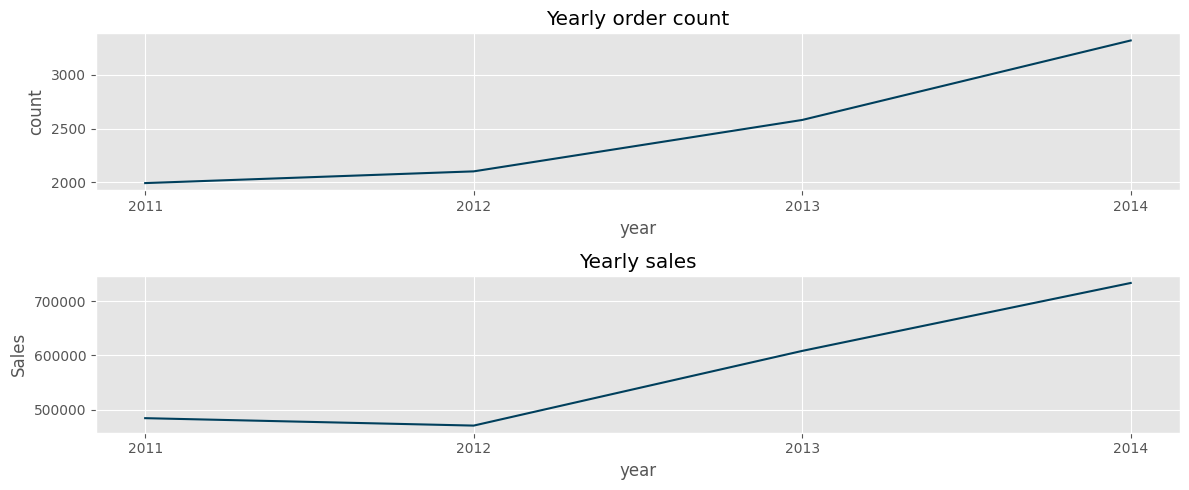

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(211)
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

In [13]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011   484247.4981
2012   470532.5090
2013   608473.8300
2014   733947.0232
Name: Sales, dtype: float64

Over time, orders had increased and so are sales. However, a slight dip in sales can be obsered in 2012. From 484,247 dollars total sales in 2011, Superstore sales slightly dipped to 470,532 dollars in the following year, which is a 2.83% difference or 13,715 dollars.

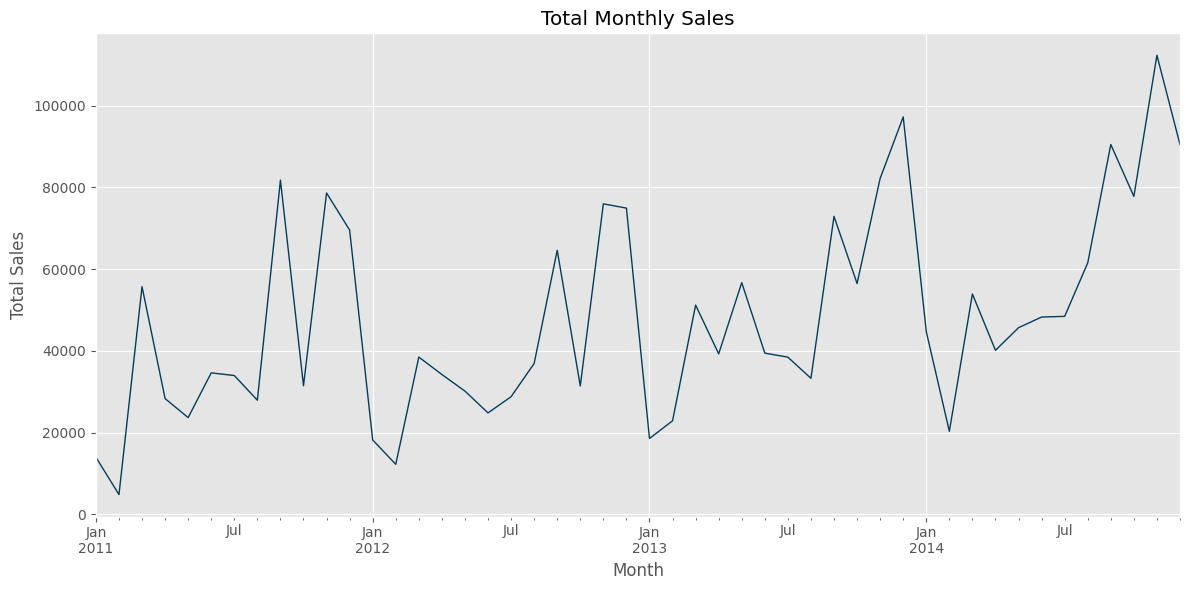

In [14]:
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

Seasonal trends occured. Superstore sales increase towards the end of the year starting in November and is sustained until December, and then drops in January. Between February and March each year, sales rise again. From April to August, a generally stable trend is evident every year. Furthermore, a sharp downward trend is observed during October.

This following provides a rouch estimate of this observation: 

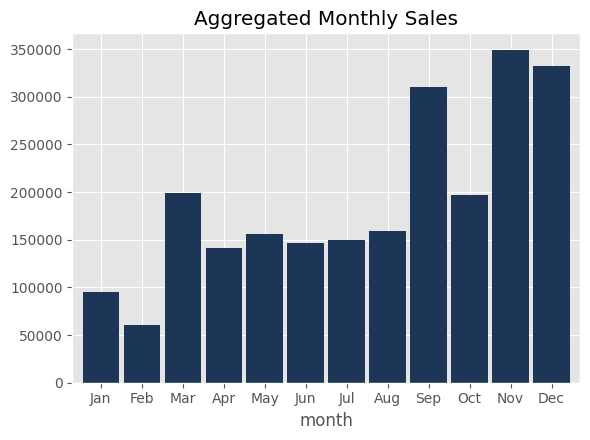

In [15]:
data.groupby('month')['Sales'].sum().plot(kind='bar',color='#1d3557',figsize=(6,4.5),width=.89)
plt.title('Aggregated Monthly Sales')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)

plt.tight_layout()
plt.show()

The visualization above shows total sales for each month over the course of 4 years. By magnitude, sales are higher towards the holiday seasons. Also, the academic year (opening of schools) in America usually starts in late August or early September, which can possibly explain higher sales in September of school-related products such as binders, home and office supplies, papers, bookcases, and accessories, among others (see graph below).

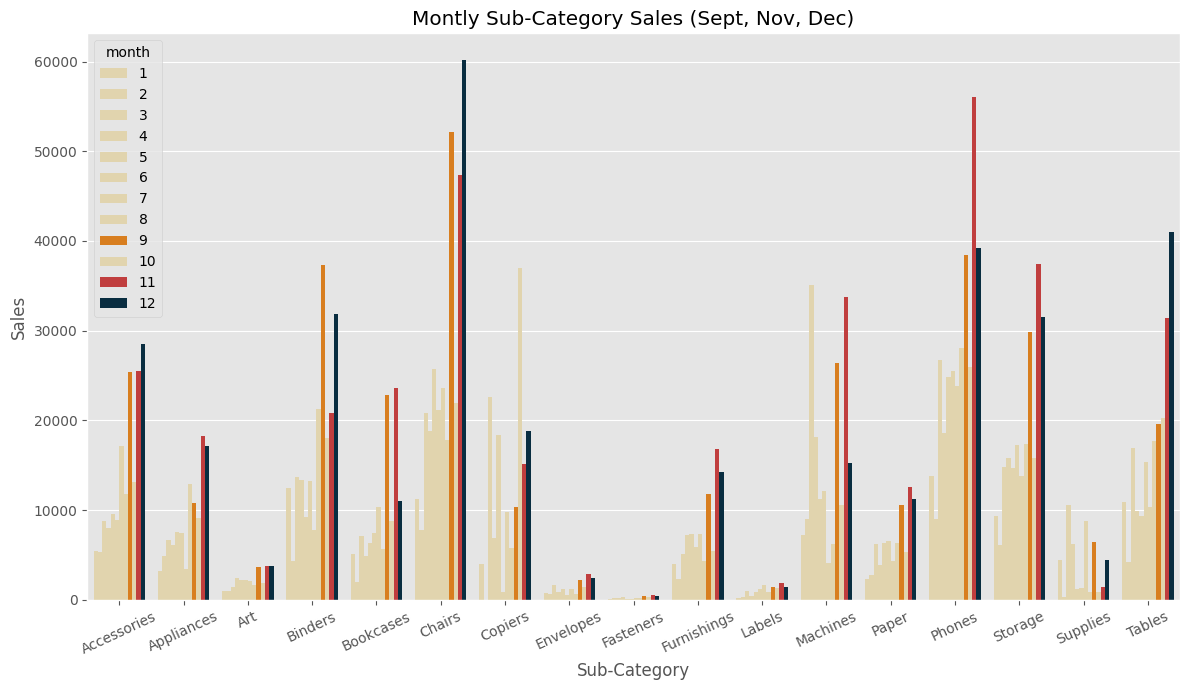

In [16]:
month_subcat=pd.DataFrame(data.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month',\
            palette=['#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#f77f00',\
                     '#e9d8a6','#d62828','#003049'])
plt.title('Montly Sub-Category Sales (Sept, Nov, Dec)')
plt.xticks(rotation=25)

plt.tight_layout()

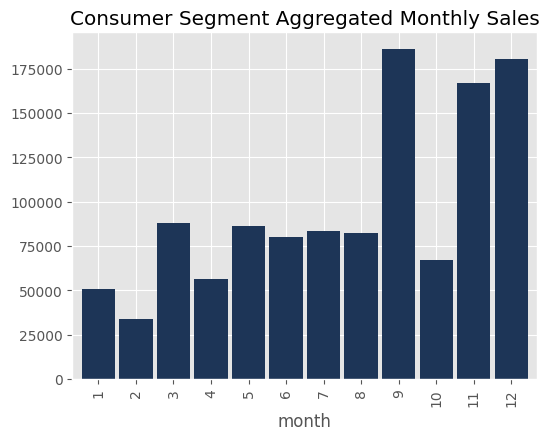

In [17]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='bar',\
                                                                         figsize=(6,4.5),\
                                                                         width=.89,\
                                                                         color='#1d3557')
plt.title('Consumer Segment Aggregated Monthly Sales')
plt.show()

Under consumer segment, sales in September, November, and December are higher than the rest of the year. This supports the possibility that increased sales in September may be due to the reopening of classes (sales of school-related products also increased).

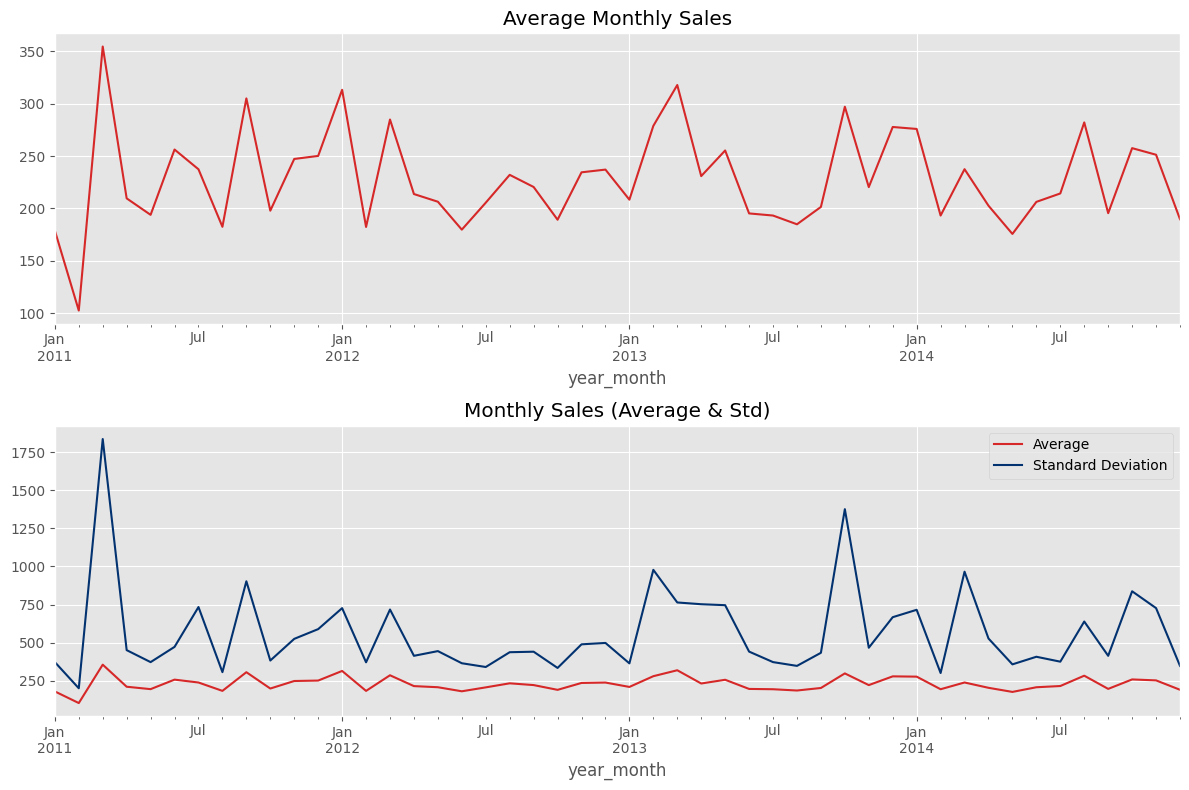

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Average Monthly Sales')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
data.groupby('year_month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

Huge variation in sales within each month can be observed throughout the period. This is confirmed by the monthly sales' standard deviation above. Interestingly, this variation seems to have a pattern. Sales were more variable during March, and around September and October. Interestingly,from April 2012 until the end of the year, there seemed to have low variability in the sales. Along with this, the general sales trend in 2012 was slightly downward, as can be seen in the total yearly sales graph - when total yearly sales dipped a little from 2011 to 2012. On the other hand, sales were more variable in 2011, 2013, and 2014.

Store sales are typically subject to variablity in sales due to a number of observable factors such as seasonality, customer behaviors, and competitive landscape, among others.

**Key findings:**
1. Yearly sales had been growing during the 4 year period. Growth was slowest in 2012 and fastest in 2013. 
2. Seasonal trends can be observed with sales. Sales generally increase towards the end of the year - November and December (holidays) and in September (possibly due to the opening of schools. Sales under consumer segment also incrased during these months. Increase in school and office supplies sales was also observed). 
3. Sales had been very variable especially in March and around September and October. No significant variability was observed from April 2012, until the end of the year.